In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import stats
# import itertools

/home/karunar/miniconda3/envs/work/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
files = sorted(glob('../results/????.csv'))

In [3]:
print("Fount files")
for file in files:
    print(file)

Fount files
../results/8691.csv
../results/8730.csv
../results/8739.csv
../results/8741.csv


In [4]:
dfs = [pd.read_csv(f, index_col=None) for f in files]
df = pd.concat(dfs, axis=0, join='inner', ignore_index=True)
df = df.sort_values('mean_sbil')

In [5]:
df = df[df.ntracks_time > 30000]
# plt.plot(df.ntracks_time, '.')

In [6]:
# fills = sorted(list(set(df['fill'].values)))

# for fill in fills:
#     plt.plot(df[df['fill']==fill].t1, df[df['fill']==fill]['mean_sbil'], '.')
#     # plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['ntracks_time'], s=markers)

# figure = plt.gcf()
# figure.set_size_inches(16,10)
# plt.legend(fills, loc=2, fontsize=legend_font)
# plt.grid()
# # plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
# # plt.ylabel("Number of tracks found", fontsize=label_font)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# # plt.savefig('ntracks_vs_SBIL.png', dpi=600)

In [7]:
markers = 30
legend_font = 15
label_font = 20

In [8]:
fills = sorted(list(set(df['fill'].values)))
nonlin = {8691: 1.25, 8730: 0.9, 8739: -0.2, 8741: -1.2}

NameError: name 'fill_legend' is not defined

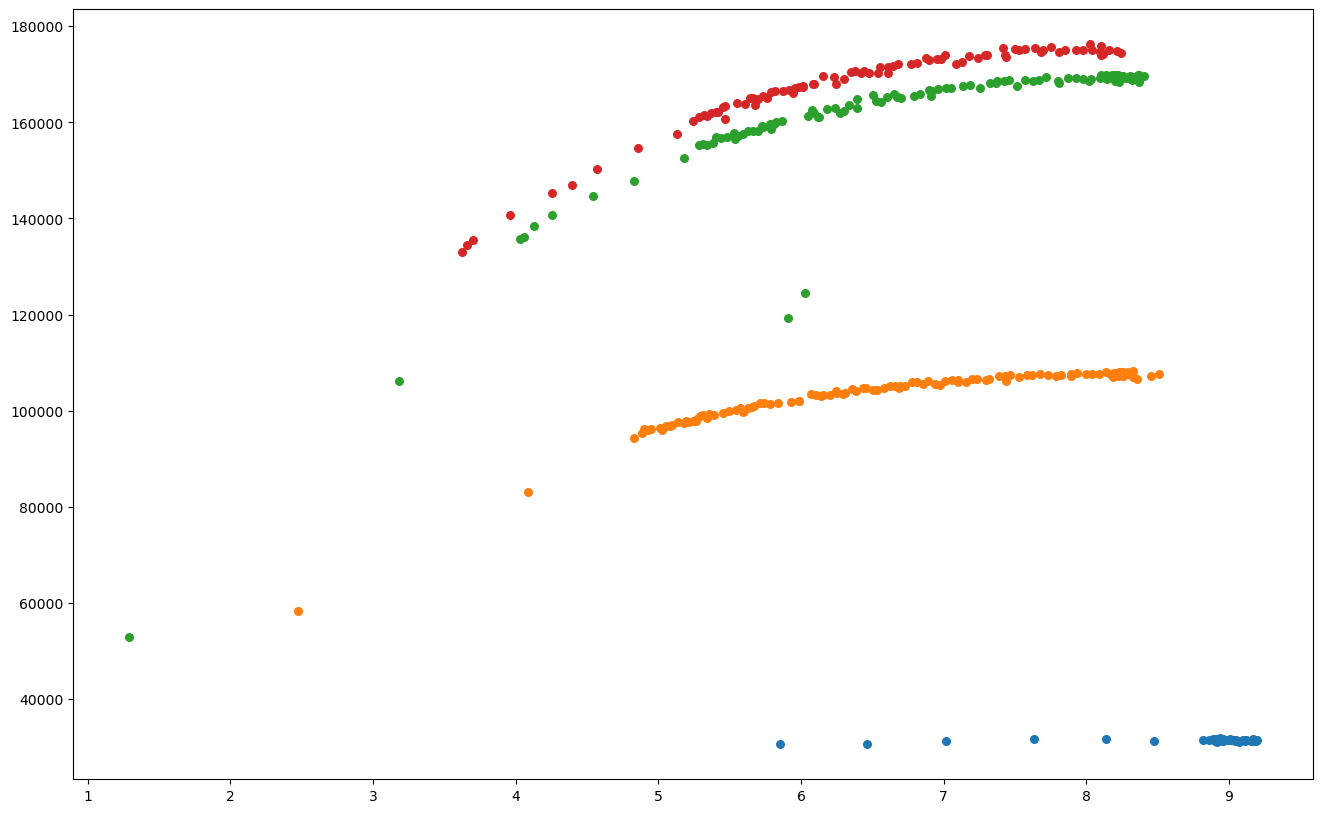

In [9]:
for fill in fills:
    plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['ntracks_time'], s=markers)

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fill_legend, loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Number of tracks found", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('ntracks_vs_SBIL.png', dpi=600)

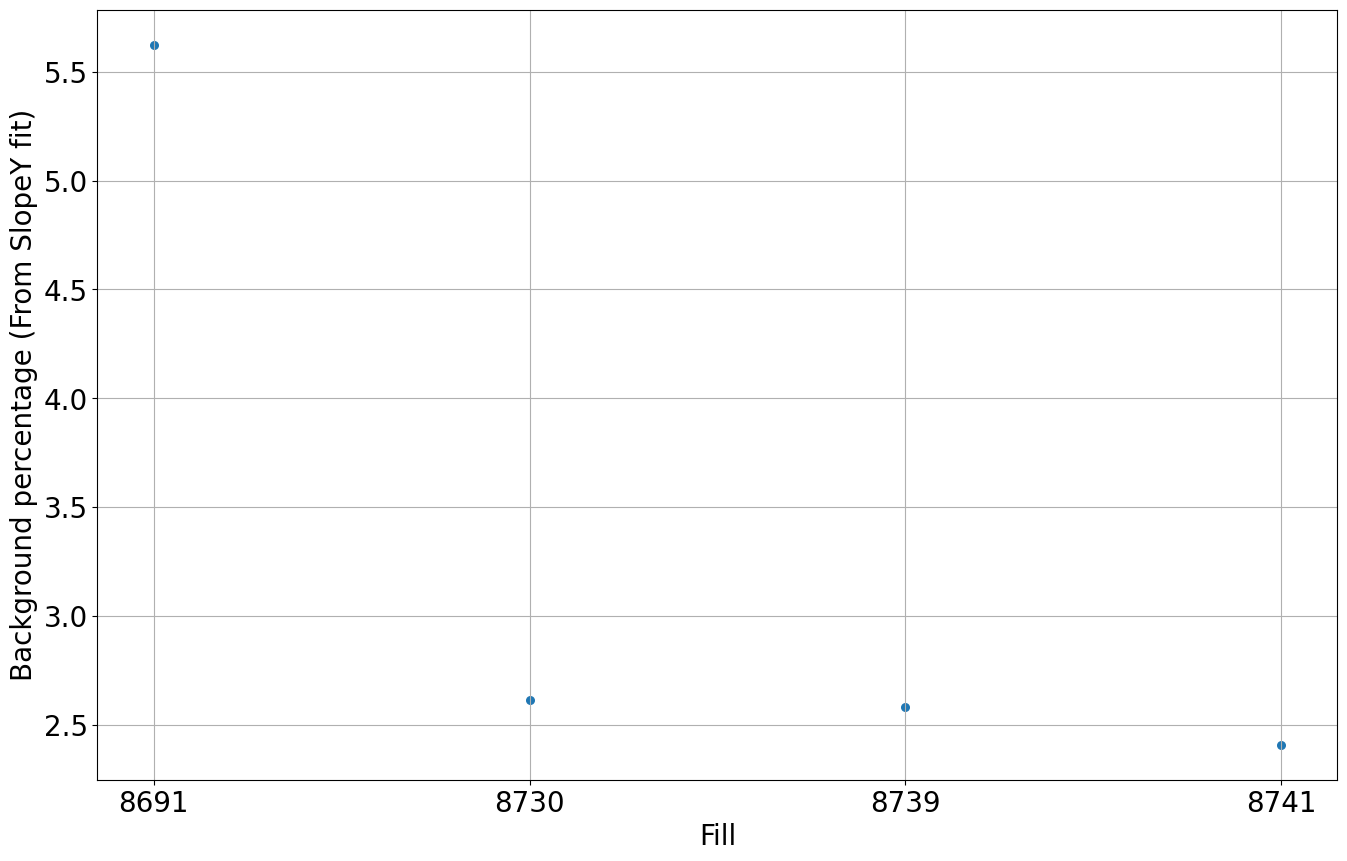

In [22]:
fills = sorted(list(set(df['fill'].values)))
mean_f = []

for fill in fills:
    mean_f.append(df[df['fill']==fill]['fSlopeY(%)'].mean())

fills = [str(x) for x in fills]
plt.scatter(fills, mean_f, s=markers)
    #plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'], '-')

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.grid()
plt.xlabel("Fill", fontsize=label_font)
plt.ylabel("Background percentage (From SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('f_vs_fill.png', dpi=600)

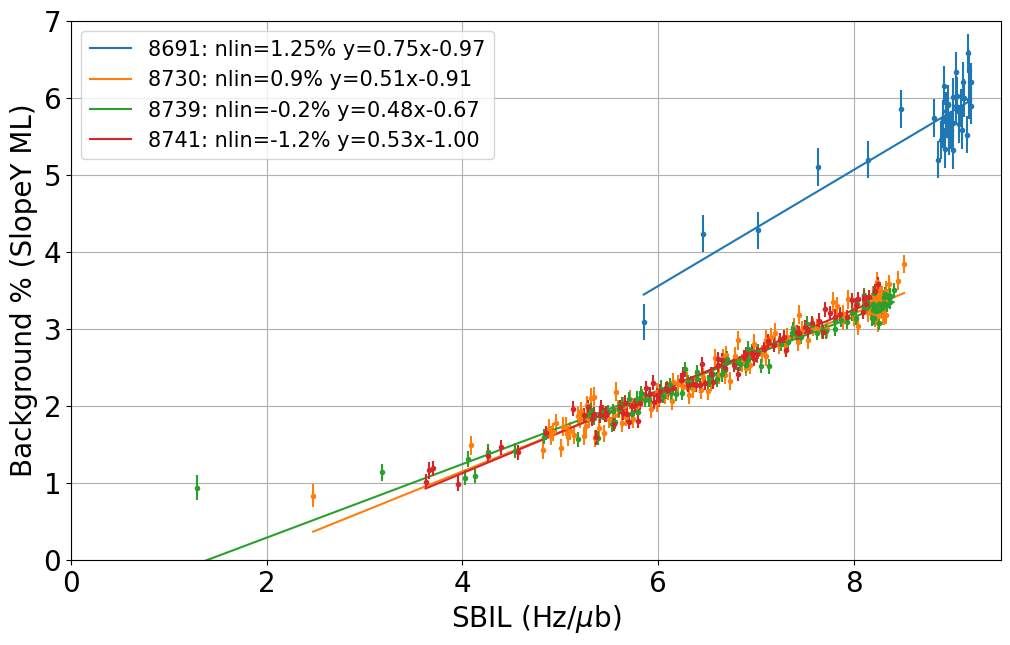

In [36]:
fills = sorted(list(set(df['fill'].values)))

ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['fSlopeY(%)']
    yerr = df[df['fill']==fill]['fSlopeY_e(%)']
    plt.errorbar(x, y, yerr=yerr, fmt='.', color=color)
    gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y)
    plt.plot(x, gradient * x + intercept, color=color, label=f"{fill}: nlin={nonlin[fill]}% y={gradient:0.2f}x{intercept:+.2f}")
    
plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background % (SlopeY ML)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 9.5])
plt.ylim([0, 7])


plt.savefig('fSlopeY_vs_SBIL.png', dpi=600)

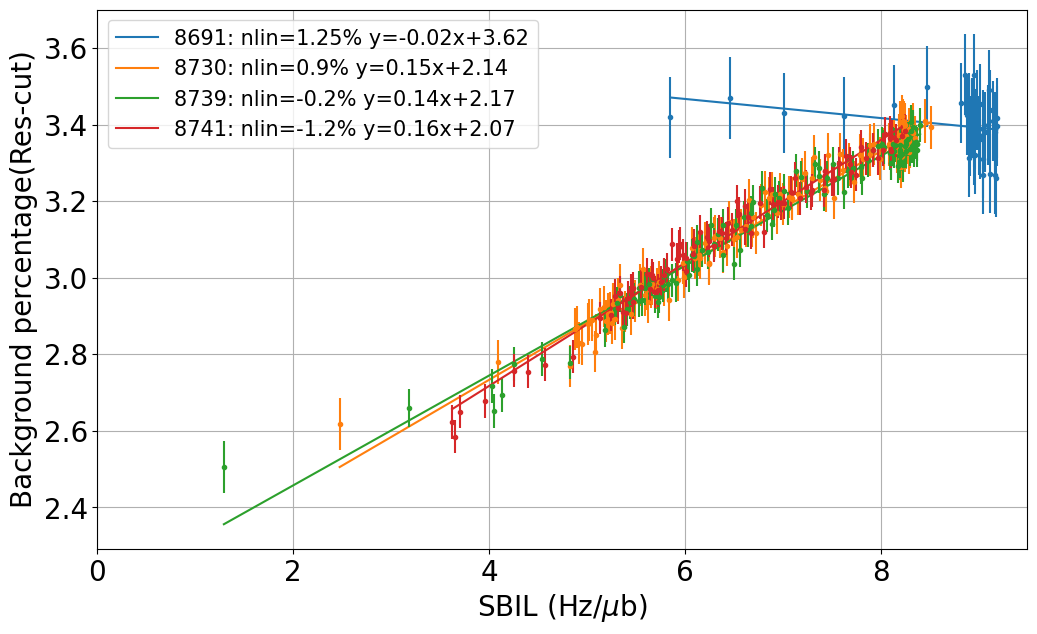

In [35]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['fR(%)']
    yerr=df[df['fill']==fill]['fR_e(%)']

    plt.errorbar(x, y, yerr=yerr, fmt='.', color=color)
    gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y)
    plt.plot(x, gradient * x + intercept, color=color, label=f"{fill}: nlin={nonlin[fill]}% y={gradient:0.2f}x{intercept:+0.2f}")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background percentage(Res-cut)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 9.5])

plt.savefig('fR_vs_SBIL.png', dpi=600)

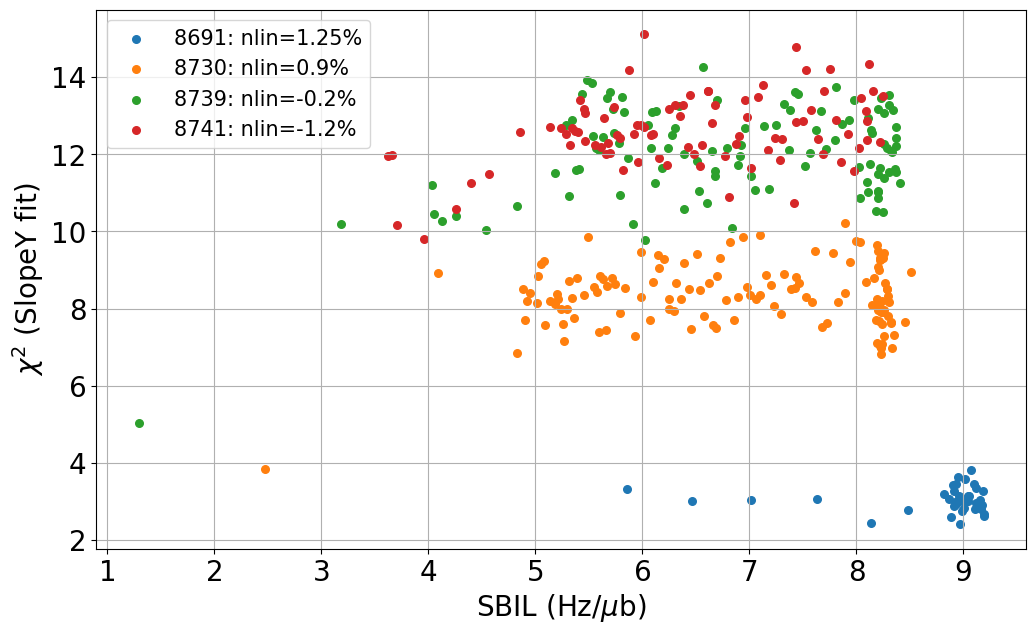

In [25]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['chi2']

    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("$\chi^{2}$ (SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('chi2_vs_SBIL.png', dpi=600)

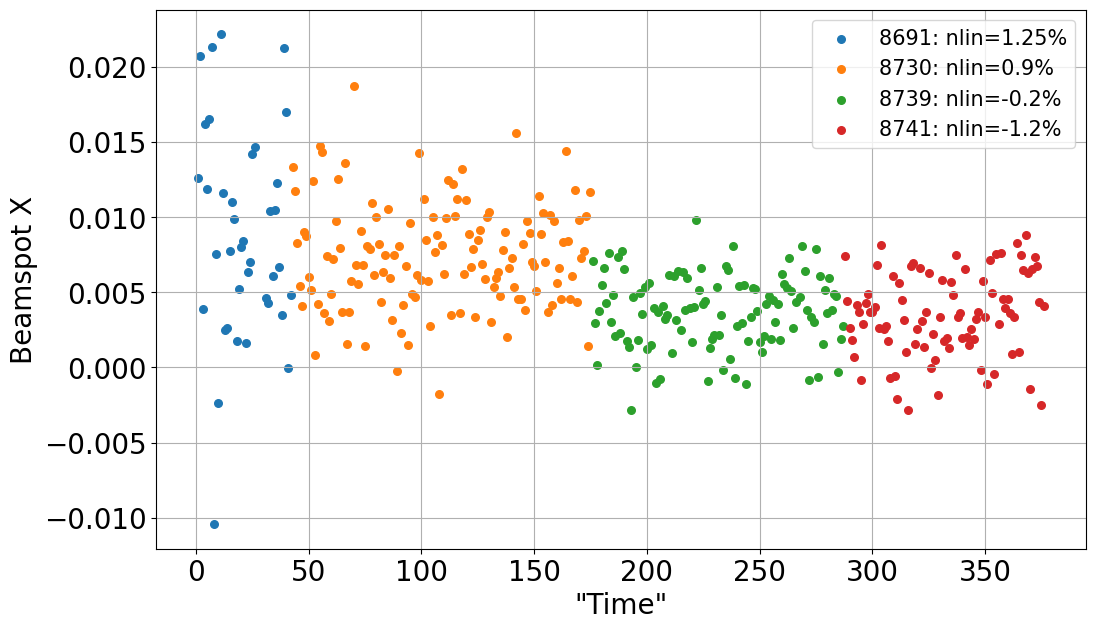

In [11]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    # x = df[df['fill']==fill]['mean_sbil']
    x = df[df['fill']==fill].index
    y = df[df['fill']==fill]['BSZ_x']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
# plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.xlabel("\"Time\"", fontsize=label_font)
plt.ylabel("Beamspot X", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('BeamspotZ_x_vs_Time.png', dpi=600)

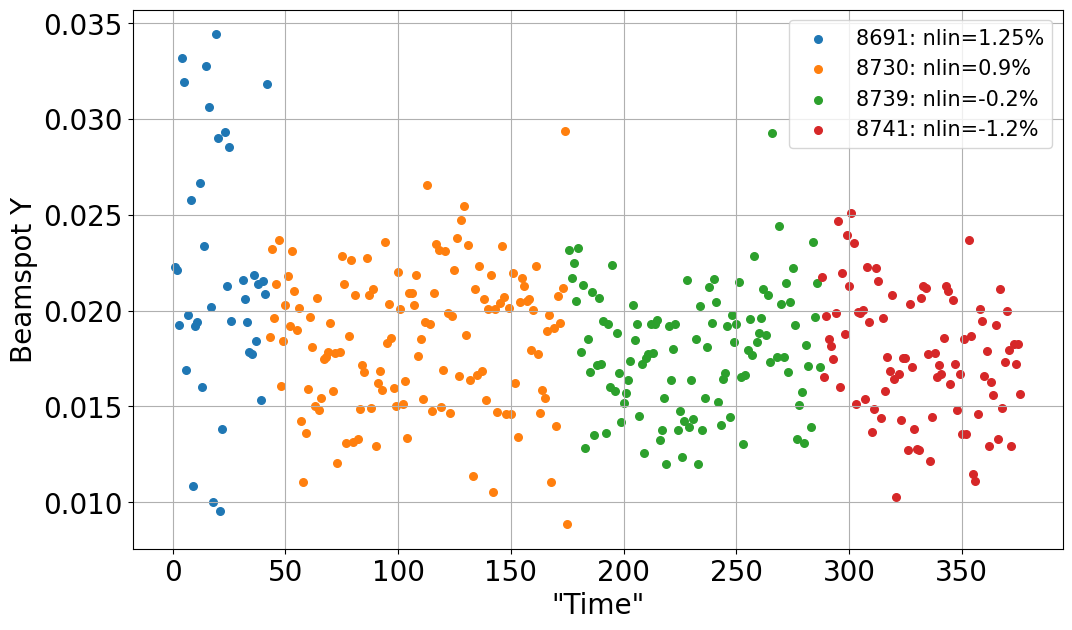

In [12]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    # x = df[df['fill']==fill]['mean_sbil']
    x = df[df['fill']==fill].index
    y =  df[df['fill']==fill]['BSZ_y']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
# plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.xlabel("\"Time\"", fontsize=label_font)
plt.ylabel("Beamspot Y", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('BeamspotZ_y_vs_SBIL.png', dpi=600)
plt.savefig('BeamspotZ_y_vs_Time.png', dpi=600)

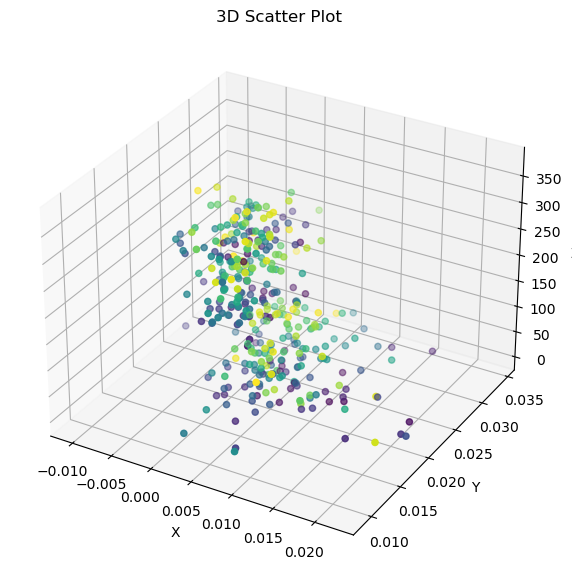

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# Create the figure and 3D axes
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for fill in fills:
    # fill = 8730
    x = df[df['fill']==fill]['BSZ_x']
    y = df[df['fill']==fill]['BSZ_y']
    z = df[df['fill']==fill].index
    ax.scatter3D(x, y, z, c=z, cmap='viridis')  
    # break

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
plt.show()

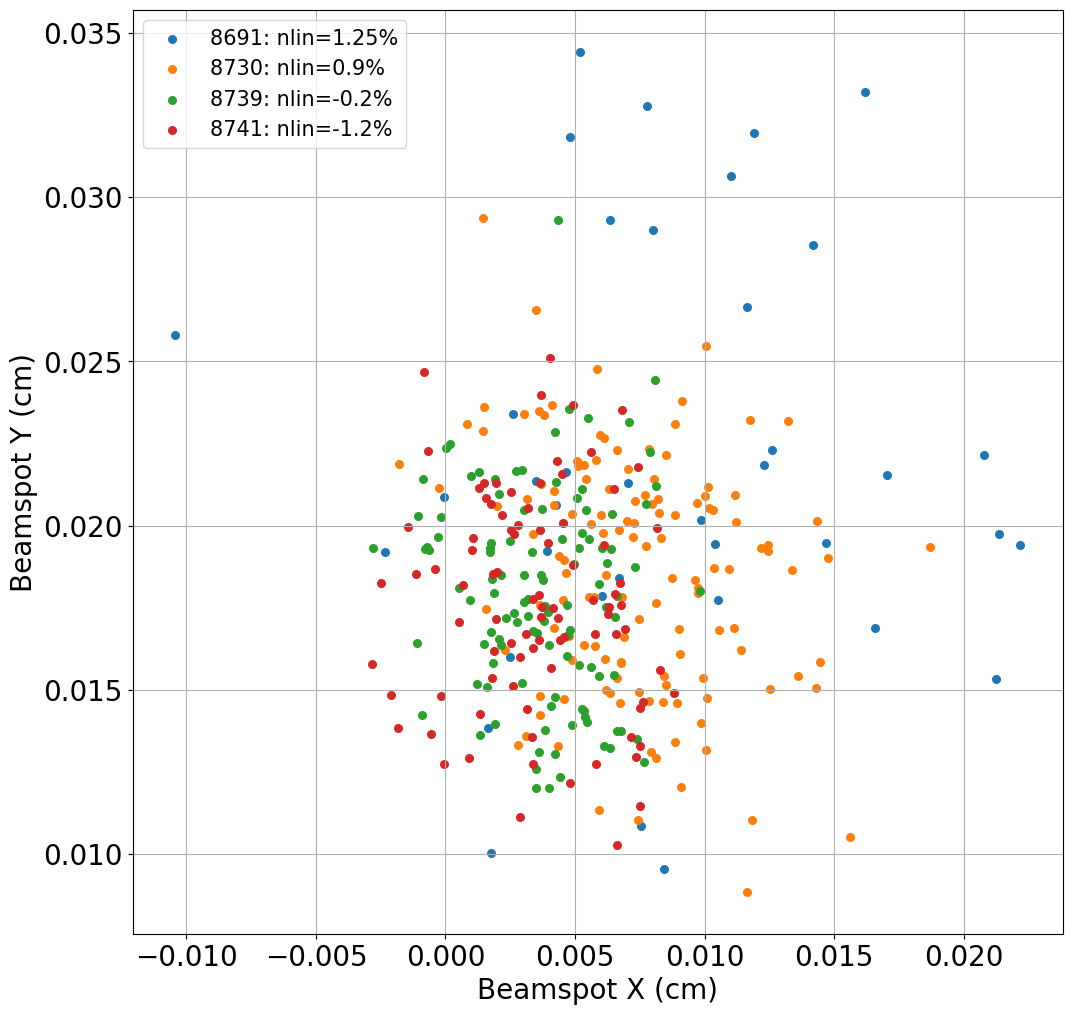

In [14]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,12)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['BSZ_x']
    y = df[df['fill']==fill]['BSZ_y']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("Beamspot X (cm)", fontsize=label_font)
plt.ylabel("Beamspot Y (cm)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# circle1 = plt.Circle((0.006, -0.004), 0.03, fill=False)
# ax = figure.gca()
# ax.add_patch(circle1)

plt.savefig('Beamspot.png', dpi=600)

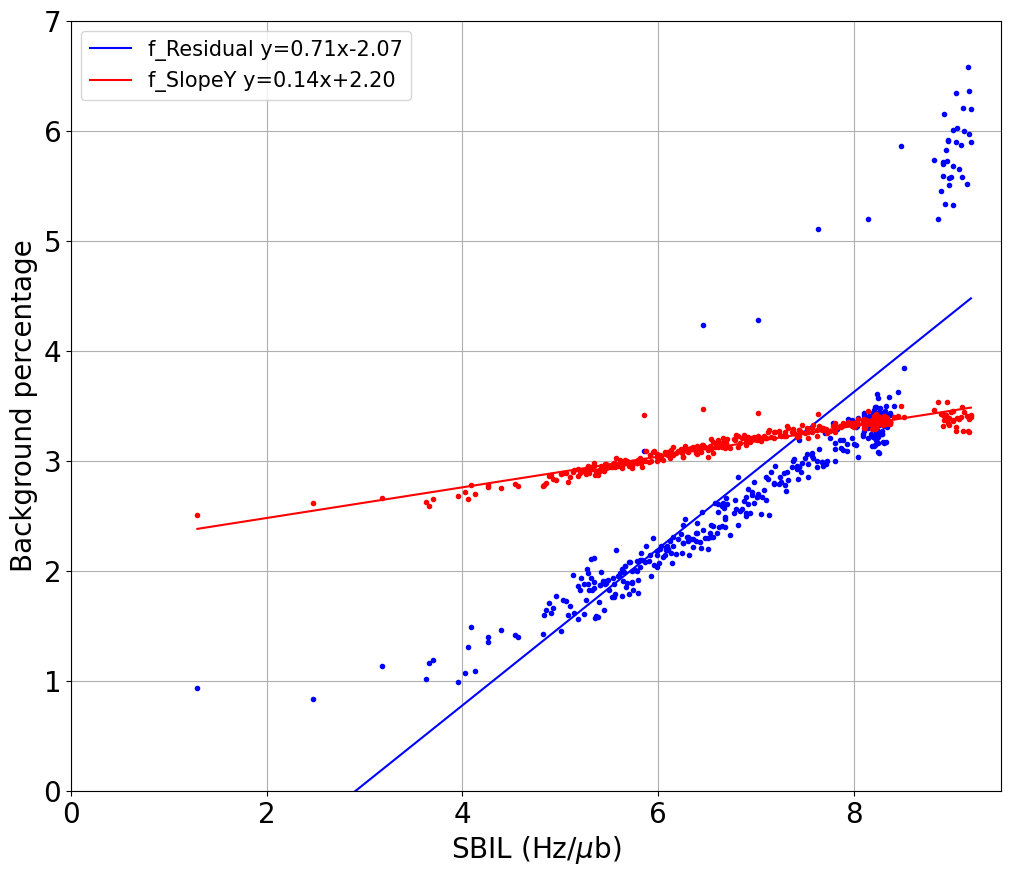

In [34]:
figure = plt.gcf()
figure.set_size_inches(12,10)
x = df['mean_sbil']
y_fS = df['fSlopeY(%)']
y_fR = df['fR(%)']

plt.plot(x, y_fS, '.b')
gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y_fS)
plt.plot(x, gradient * x + intercept, 'b', label=f"f_Residual y={gradient:.2f}x{intercept:+.2f}")

plt.plot(x, y_fR, '.r')
gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y_fR)
plt.plot(x, gradient * x + intercept, 'r', label=f"f_SlopeY y={gradient:.2f}x{intercept:+.2f}")

plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background percentage", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 9.5])
plt.ylim([0, 7])

plt.savefig('fR_and_fS_vs_SBIL.png', dpi=600)

In [ ]:
for fill in fills:
    plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)']/df[df['fill']==fill]['mean_sbil'], '-o')
    

figure = plt.gcf()
figure.set_size_inches(16, 10)
plt.legend(fill_legend, loc=0, fontsize=legend_font)
#plt.legend(["f_SlopeY","f_Residual"], loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("f/SBIL", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0,1])

plt.savefig('rate_vs_SBIL.png', dpi=600)